In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
features = ['safety/features/' + i for i in os.listdir('safety/features/') if '.csv' in i]
features

['safety/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv',
 'safety/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv']

In [3]:
df_features = [pd.read_csv(f) for f in features]
df = pd.concat(df_features)
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1657857376413,10.000,128.234833,0.780280,-9.869086,-0.019440,-0.143924,-0.016662,-0.016986,497.0,16.030001
1,25769803913,6.000,286.368225,9.086713,0.309390,-3.506772,0.008518,-0.006350,0.003299,120.0,2.089626
2,1434519076946,12.136,339.000000,0.946808,9.609665,2.311615,-0.011124,-0.320435,-0.062027,76.0,5.540000
3,283467841697,3.000,186.000000,0.900247,7.996878,5.286559,0.000874,-0.009702,0.020248,22.0,0.276720
4,481036337236,3.090,18.000000,0.045000,9.882000,0.173000,0.038839,-0.284030,-0.078576,1522.0,1.306365


In [4]:
df.shape

(16135561, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135561 entries, 0 to 1613554
Data columns (total 11 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtypes: float64(10), int64(1)
memory usage: 1.4 GB


## Accuracy study

In [6]:
df['Accuracy'].describe()

count    1.613556e+07
mean     1.161035e+01
std      8.691672e+01
min      7.500000e-01
25%      3.900000e+00
50%      4.250000e+00
75%      8.000000e+00
max      6.070101e+03
Name: Accuracy, dtype: float64

We have very weird positive outliers, `6.070101e+03`

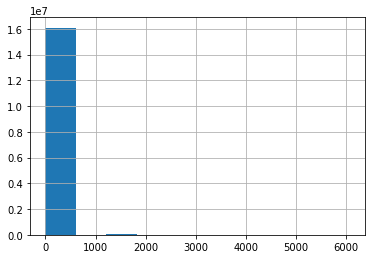

In [7]:
df['Accuracy'].hist()
plt.show()

Only accept if the accuracy is lower than 10 and bigger than or equal to 3

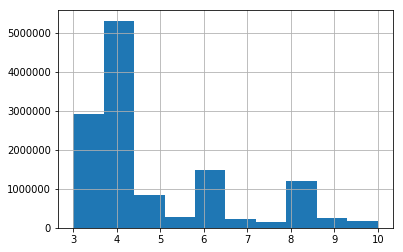

In [8]:
df = df.loc[(df['Accuracy'] < 10) & (df['Accuracy'] >= 3)]
df['Accuracy'].hist()
plt.show()

In [9]:
df['Accuracy'].skew()

1.1691860272466015

Very right skew, bigger than +1.0

In [10]:
df['Accuracy'].describe()

count    1.281473e+07
mean     4.735086e+00
std      1.711112e+00
min      3.000000e+00
25%      3.900000e+00
50%      4.000000e+00
75%      6.000000e+00
max      9.999000e+00
Name: Accuracy, dtype: float64

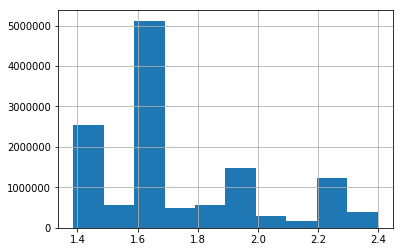

In [11]:
np.log1p(df['Accuracy']).hist()

In [12]:
np.log1p(df['Accuracy']).skew()

0.799693173037151

In [13]:
np.log1p(df['Accuracy']).kurtosis()

-0.43226957957973644

In [14]:
df['Accuracy'] = np.log1p(df['Accuracy'])

## But wait, we why we need to reduce skewness?

We do not want our model bias to our distribution. If right skewed, the model will become very good on right skewed data, but not on left skewed data.

And some algorithms like trees based, skewness will make our branches not distributed well.

## acceleration_x study

In [15]:
df['acceleration_x'].describe()

count    1.281473e+07
mean     8.968010e-02
std      1.389602e+00
min     -7.841969e+01
25%     -4.850000e-01
50%      8.379962e-02
75%      6.519775e-01
max      4.770832e+01
Name: acceleration_x, dtype: float64

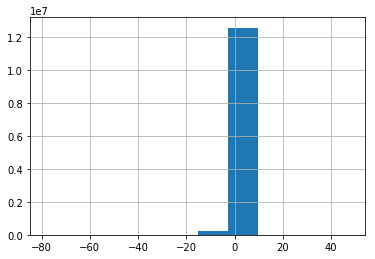

In [16]:
df['acceleration_x'].hist()

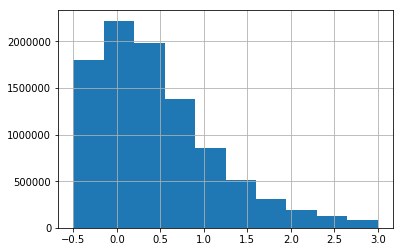

In [17]:
df = df.loc[(df['acceleration_x'] < 3) & (df['acceleration_x'] >= -0.5)]
df['acceleration_x'].hist()

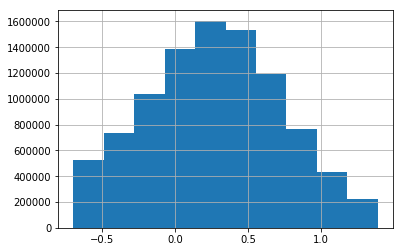

In [18]:
np.log1p(df['acceleration_x']).hist()

In [19]:
df['acceleration_x'] = np.log1p(df['acceleration_x'])

## acceleration_y study

In [20]:
df['acceleration_y'].describe()

count    9.452601e+06
mean     6.873323e+00
std      6.366598e+00
min     -5.423616e+01
25%      8.444607e+00
50%      9.366403e+00
75%      9.776504e+00
max      6.426331e+01
Name: acceleration_y, dtype: float64

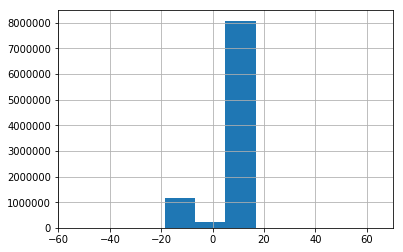

In [21]:
df['acceleration_y'].hist()

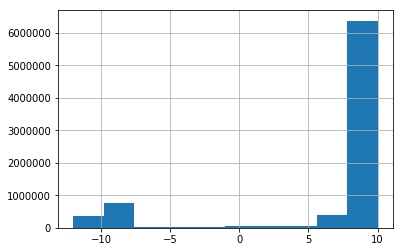

In [22]:
df = df.loc[(df['acceleration_y'] < 10) & (df['acceleration_y'] >= -12)]
df['acceleration_y'].hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


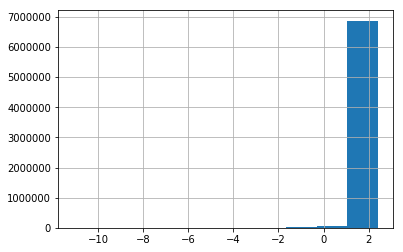

In [23]:
np.log1p(df['acceleration_y']).hist()

In [24]:
np.log1p(df['acceleration_y']).skew()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


-9.418599516409829

log doesnt help us very much. How about boxcox?

In [25]:
from scipy.stats import boxcox, skew

In [26]:
impurity = 20 # boxcox must positive numbers
skewness = []
for i in range(-10, 20, 1):
    s = skew(boxcox(df['acceleration_y'] + impurity, lmbda = i))
    print(i, s)
    skewness.append(s)

-10 -7.670024615200168
-9 -6.2020338868824965
-8 -5.001717976651602
-7 -4.067755531528091
-6 -3.3744339256647122
-5 -2.8812189460600557
-4 -2.5431710766273232
-3 -2.318203017866659
-2 -2.1697676357319393
-1 -2.066484726934092
0 -1.9824097162230494
1 -1.9000044247872236
2 -1.812149453299553
3 -1.7191945211794943
4 -1.623889441606016
5 -1.52853913295449
6 -1.4345410796272267
7 -1.3427076334959946
8 -1.2535503183163488
9 -1.167412967447572
10 -1.0845215794979226
11 -1.005005140241019
12 -0.9289102209148901
13 -0.8562155632856244
14 -0.7868469009590126
15 -0.7206909418719
16 -0.6576076299562664
17 -0.5974402823508882
18 -0.5400235804530342
19 -0.48518961602679744


18 and 19 keep decreasing

In [27]:
skew(boxcox(df['acceleration_y'] + impurity, lmbda = 30))

-0.010024291769191836

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb13d8cf60>]],
      dtype=object)

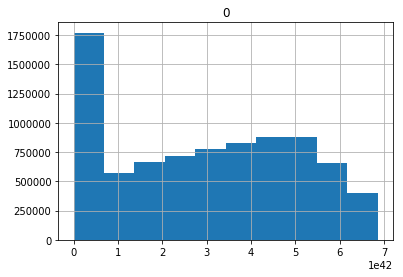

In [28]:
pd.DataFrame(boxcox(df['acceleration_y'] + impurity, lmbda = 30)).hist()

But if you look at the scale, `1e42`, very big, we should reduce the variance, tree algorithms all about variance. We are going to use z-score to transform the scale.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb13d19be0>]],
      dtype=object)

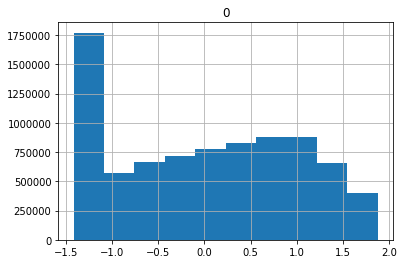

In [29]:
cox = boxcox(df['acceleration_y'] + impurity, lmbda = 30)
pd.DataFrame((cox - cox.mean()) / cox.std()).hist()

In [30]:
df['acceleration_y'] = (cox - cox.mean()) / cox.std()

## acceleration_z study

In [31]:
df['acceleration_z'].describe()

count    8.149580e+06
mean     1.412683e+00
std      2.908094e+00
min     -3.891800e+01
25%     -3.974375e-01
50%      1.238510e+00
75%      3.172414e+00
max      4.992302e+01
Name: acceleration_z, dtype: float64

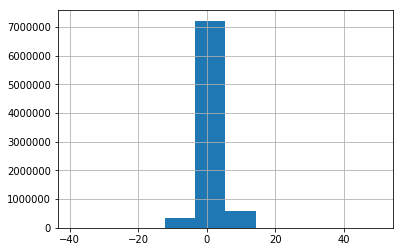

In [32]:
df['acceleration_z'].hist()

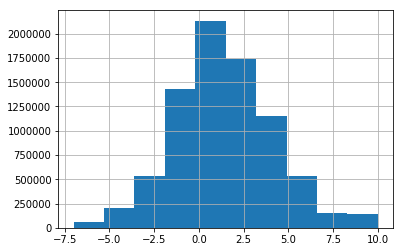

In [33]:
df.loc[(df['acceleration_z'] < 10) & (df['acceleration_z'] >= -7)]['acceleration_z'].hist()

No need to transform anything, already perfect.

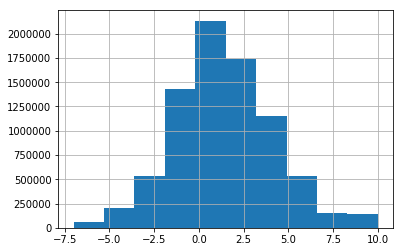

In [34]:
df = df.loc[(df['acceleration_z'] < 10) & (df['acceleration_z'] >= -7)]
df['acceleration_z'].hist()

## gyro_x study

In [35]:
df['gyro_x'].describe()

count    8.076313e+06
mean    -2.453627e-03
std      1.013577e-01
min     -1.792995e+01
25%     -2.198919e-02
50%     -4.886922e-04
75%      1.827712e-02
max      3.870809e+01
Name: gyro_x, dtype: float64

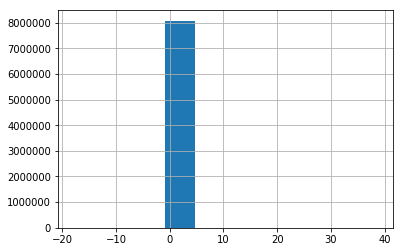

In [36]:
df['gyro_x'].hist()

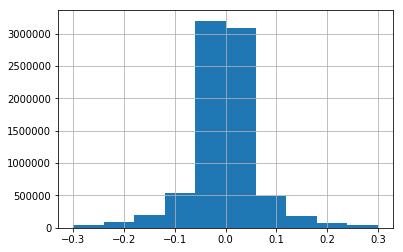

In [37]:
df = df.loc[(df['gyro_x'] < 0.3) & (df['gyro_x'] >= -0.3)]
df['gyro_x'].hist()

## gyro_y study

In [38]:
df['gyro_y'].describe()

count    7.942422e+06
mean    -9.676025e-03
std      3.038077e-01
min     -3.259038e+01
25%     -2.687807e-02
50%     -7.202101e-04
75%      1.867676e-02
max      5.226024e+01
Name: gyro_y, dtype: float64

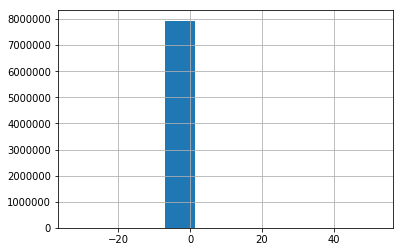

In [39]:
df['gyro_y'].hist()

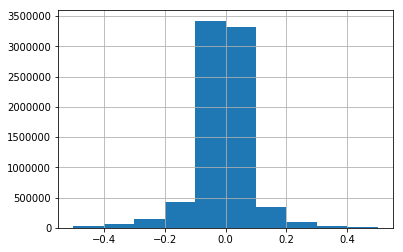

In [40]:
df = df.loc[(df['gyro_y'] < 0.5) & (df['gyro_y'] >= -0.5)]
df['gyro_y'].hist()

## gyro_z study

In [41]:
df['gyro_z'].describe()

count    7.884311e+06
mean     8.026874e-05
std      5.610693e-02
min     -6.938964e+00
25%     -1.429749e-02
50%      7.330383e-06
75%      1.466076e-02
max      9.951006e+00
Name: gyro_z, dtype: float64

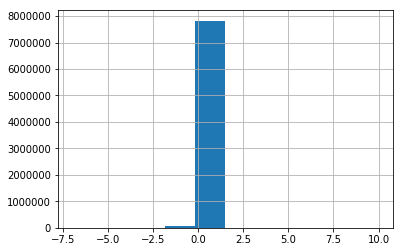

In [42]:
df['gyro_z'].hist()

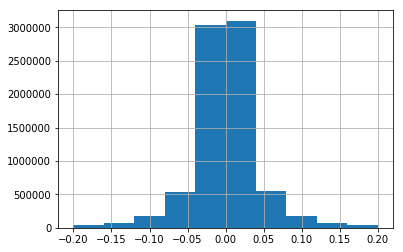

In [43]:
df = df.loc[(df['gyro_z'] < 0.2) & (df['gyro_z'] >= -0.2)]
df['gyro_z'].hist()

## second study

In [44]:
df['second'].describe()

count    7.791986e+06
mean     3.140087e+03
std      1.255052e+06
min      0.000000e+00
25%      2.390000e+02
50%      5.160000e+02
75%      8.550000e+02
max      6.193166e+08
Name: second, dtype: float64

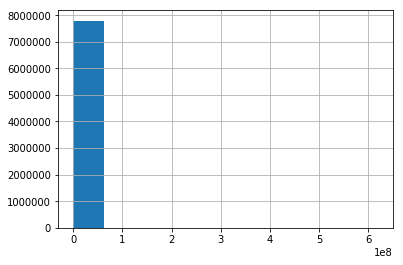

In [45]:
df['second'].hist()

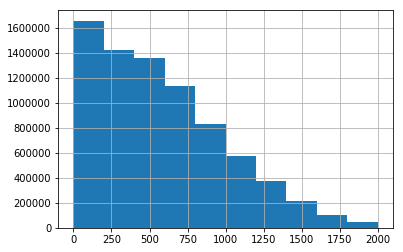

In [46]:
df = df.loc[(df['second'] <= 2000)]
df['second'].hist()

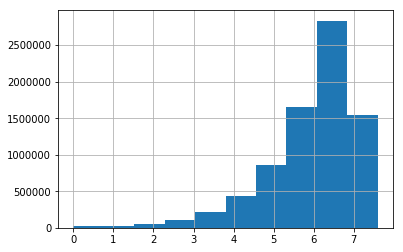

In [47]:
np.log1p(df['second']).hist()

In [48]:
impurity = 1 # boxcox must positive numbers
skewness = []
for i in range(-10, 20, 1):
    s = skew(boxcox(df['second'] + impurity, lmbda = i))
    print(i, s)
    skewness.append(s)

-10 -28.434647615357683
-9 -28.43452989211385
-8 -28.434059252291433
-7 -28.43217821531888
-6 -28.42466185596544
-5 -28.394620116299258
-4 -28.27429703849812
-3 -27.78848003395424
-2 -25.772775304337873
-1 -16.792275194939688
0 -1.5017412183509165
1 0.7403018778661756
2 2.0068445024908175
3 3.1868048468085695
4 4.364548772840855
5 5.53624562268223
6 6.682160782307944
7 7.785952125875494
8 8.838515496840378
9 9.836851506105187
10 10.781940803735244
11 11.676941609371138
12 12.525964343651534
13 13.33333681468297
14 14.103209155159595
15 14.839370281054837
16 15.545186147499237
17 16.22360280975919
18 16.877180349778527
19 17.508138553731058


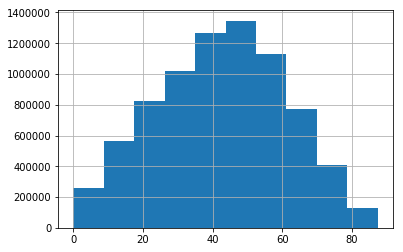

In [49]:
df['second'] = boxcox(df['second'] + impurity, lmbda = 0.5)
df['second'].hist()

## Speed study

In [50]:
df['Speed'].describe()

count    7.729825e+06
mean     8.283212e+00
std      8.199280e+00
min     -1.254542e+00
25%      0.000000e+00
50%      6.091590e+00
75%      1.487000e+01
max      4.280735e+01
Name: Speed, dtype: float64

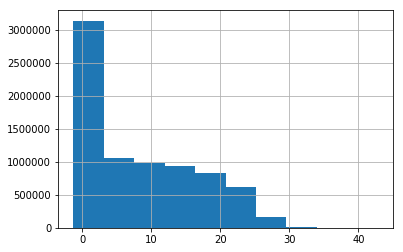

In [51]:
df['Speed'].hist()

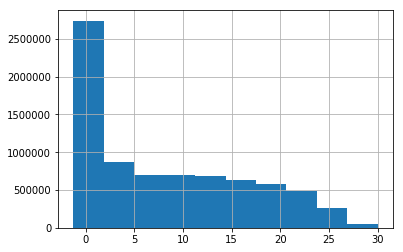

In [52]:
df = df.loc[df['Speed'] < 30]
df['Speed'].hist()

In [53]:
impurity = 5
np.log1p(df['Speed'] + impurity).skew()

0.11511727222868821

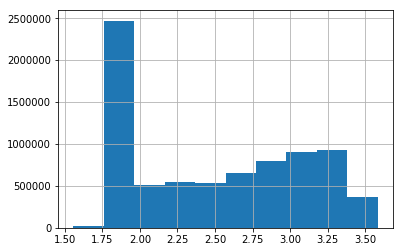

In [54]:
df['Speed'] = np.log1p(df['Speed'] + impurity)
df['Speed'].hist()

In [55]:
reduce_rows = (16135561 - df.shape[0]) / 16135561
print('we reduced %.3f%% of rows'%(reduce_rows * 100))

we reduced 52.137% of rows


In [56]:
Y = pd.read_csv('safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')
Y.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [57]:
Y.shape

(20018, 2)

In [58]:
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
3,283467841697,1.386294,186.000000,0.641984,-1.001509,5.286559,0.000874,-0.009702,0.020248,7.591663,1.836848
4,481036337236,1.408545,18.000000,0.044017,1.510331,0.173000,0.038839,-0.284030,-0.078576,76.051265,1.988746
7,463856468005,2.197225,80.834740,0.786156,-1.415785,-0.800766,-0.047295,0.037131,0.101335,71.293929,3.272002
14,1228360646688,1.945910,24.443703,0.625299,-1.415785,-3.008817,-0.055972,-0.021167,-0.094948,58.066630,2.842691
16,1305670057997,1.609438,47.000000,-0.092757,-0.944458,5.898116,-0.020240,-0.051133,0.021305,22.494897,3.166802


In [59]:
merged = pd.merge(df, Y, on='bookingID')
merged.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,283467841697,1.386294,186.0,0.641984,-1.001509,5.286559,0.000874,-0.009702,0.020248,7.591663,1.836848,0
1,283467841697,1.589235,95.0,0.298006,-1.119554,6.541159,-0.019895,0.012900,0.014139,62.652920,3.160790,0
2,283467841697,1.945910,15.0,0.348262,-0.680085,4.333637,0.056463,0.104530,0.053234,63.299311,2.694659,0
3,283467841697,1.635301,199.0,0.563375,-1.204765,6.399897,0.004539,0.006792,0.002533,40.567593,2.088836,0
4,283467841697,1.589235,123.0,0.741448,-1.178372,5.564295,-0.001569,0.004959,0.003754,21.494680,2.749331,0


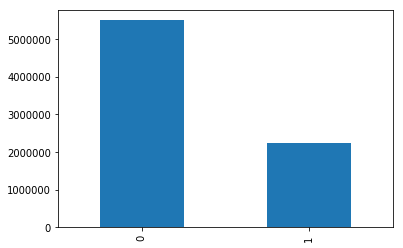

In [62]:
merged['label'].value_counts().plot(kind='bar')

In [64]:
merged.to_csv('merged.csv',index=False)